# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2022W2/tree/main/lectures) 

**Due date: Monday Jan 23, 2023 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [2]:
spotify_df = pd.read_csv("data.csv", index_col=0)

# spotify_df.shape says 16 columns including the target, so 15 columns excluding the target



Excluding the target, how many columns (potential features) does the dataset include?

15 columns excluding the target.

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

# df_train.shape yields 1613
# df_test.shape yields 404

1613 training samples and 404 test samples

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
df_train_describe = df_train.describe()
print(df_train_describe)
columns = []

for col in df_train_describe.columns:
    columns.append(col)

max = 0
column_name = " "

# iterate through all columns to find the largest range
for idx in columns:
    temp = df_train_describe[idx].max() - df_train_describe[idx].min()
    
    if (temp > max):
        max = temp
        column_name = idx

print(max, column_name)

print("The feature with the largest range is", column_name, "at", max )

# The feature with the largest range is "duration_ms" at 1003014.0

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

danceability


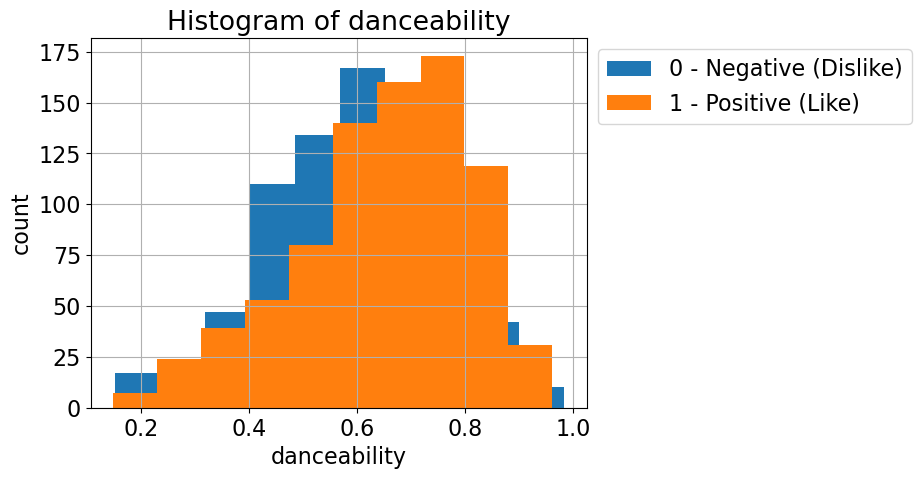

energy


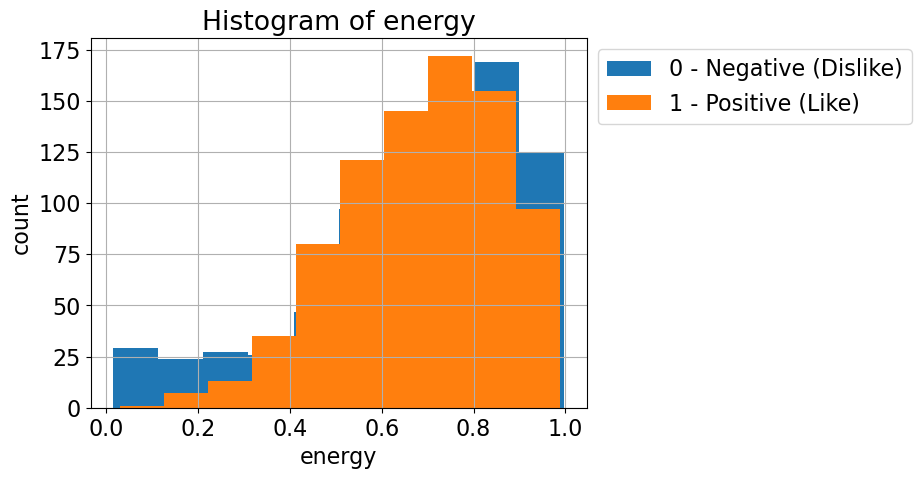

tempo


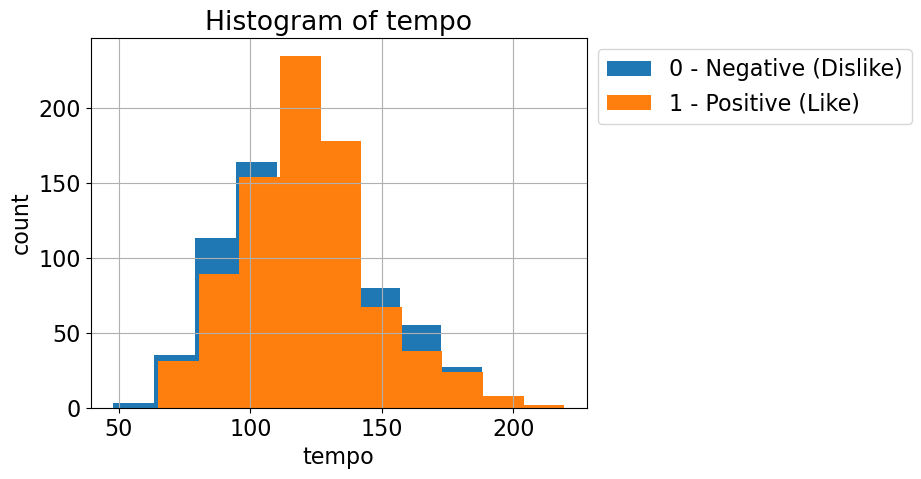

valence


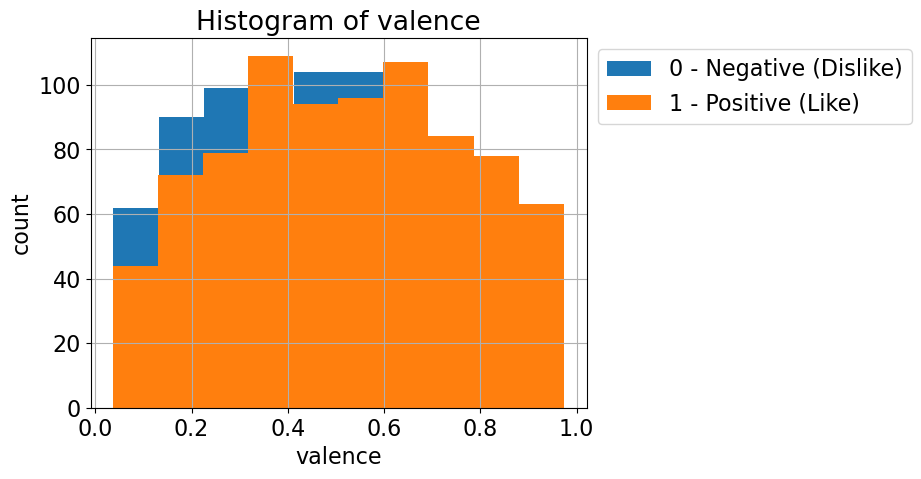

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

columns = list(negative_examples) #grab names of columns

for idx in columns:
    # we focus on danceability, tempo, energy, and valence
    if (idx == "danceability" or idx == "tempo" or idx == "energy" or idx == "valence"):
        print(idx)
        negative_examples[idx].hist(legend=True)
        positive_examples[idx].hist(legend=True)
        plt.legend(["0 - Negative (Dislike)", "1 - Positive (Like)"], loc="upper left", bbox_to_anchor=(1,1));
        plt.xlabel(idx)
        plt.ylabel("count")
        plt.title("Histogram of " + idx)
        plt.show()
        
    continue
        

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Data splitting is best done to minimize impurity.

A reasonable split for danceability would be to predict 0 if danceability < 0.65 (and predict 1 otherwise).

A reasonable split for energy would be to predict 0 if energy < 0.3 (and predict 1 otherwise).

A reasonable split for tempo would be to predict 0 if tempo < 110 (and predict 1 otherwise).

A reasonable split for valence would be to predict 0 if valence < -0.6 (and predict 1 otherwise).

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

My Answer: It is not useful because the feature is not a "predictor" as it has NO EFFECT on data.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [6]:
df_train[["song_title", "artist"]].head()
#df_train["song_title"].nunique() this yields approx 1600
#df_train["artist"].nunique() this yields approx 1100
#recall that total sample in df_train is approx 2000

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Of the two features, the artist would be more useful than song title in predicting whether the user liked the song or not because artists could have many songs under their name (some people follow the artist wholeheartedly) and thus could make valuable data via grouping. Using the song name would not be useful in predicting whether the user liked the song or not because of how many unique songs there are. 

There would be difficulty in using the artist and song name because of the number of unique occurences and of the features being text. If it were to be "yes" or "no", it would be as easy as translating them into binary 1 for yes, and 0 for no.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [7]:
# Create X_train, y_train from df_train, skipping song_title and artist
X_train, y_train = df_train.drop(columns=["target", "song_title", "artist"]), df_train["target"]

# Create X_test, y_test from df_test, skipping song_title and artist
X_test, y_test = df_train.drop(columns=["target", "song_title", "artist"]), df_train["target"]

# Fit a DecisionTreeClassifier on the train set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# ===================================================
# Question 2b below
print(model.predict(X_train.iloc[[9]]))
print(y_train.iloc[10])



[1]
1


#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

Yes, the prediction is correct as it matches with y_train.iloc[10].

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [8]:
# ===================================================
# Question 2c below
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print("The cv_scores are: ")
print(cv_scores)



The cv_scores are: 
[0.66666667 0.64197531 0.65432099 0.72049689 0.72049689 0.62111801
 0.73291925 0.77018634 0.65217391 0.69565217]


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [9]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("The scores are: ")
pd.DataFrame(scores)

# The cross-validation score is not exactly the same as what I got in the previous part, but are very close to each other. 

The scores are: 


,fit_time,score_time,test_score,train_score
0,0.012383,0.001001,0.691358,0.999311
1,0.010743,0.002002,0.641975,0.998622
2,0.011679,0.001002,0.666667,0.999311
3,0.010533,0.001001,0.732919,0.998623
4,0.010114,0.001001,0.739130,0.998623
5,0.012053,0.001002,0.602484,0.998623
6,0.011513,0.001000,0.714286,0.998623
7,0.012521,0.001311,0.745342,0.999311
8,0.010526,0.001002,0.633540,0.999311
9,0.011799,0.001503,0.701863,0.998623


#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

It is not a significant difference between the training score and the cross-validation score and it may be because we are running cross_validate across another 10-fold that may be a little different than from the 10-fold from cross_val_score.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

It is not very trustworthy because the train scores are close to 1. This means that it is very sensitive to training data and thus will learn unreliable patterns...becoming overfit. 

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

The length of the list of chosen depths is:  25


mean_train_acc    0.764345
mean_test_acc     0.732781
Name: 4, dtype: float64

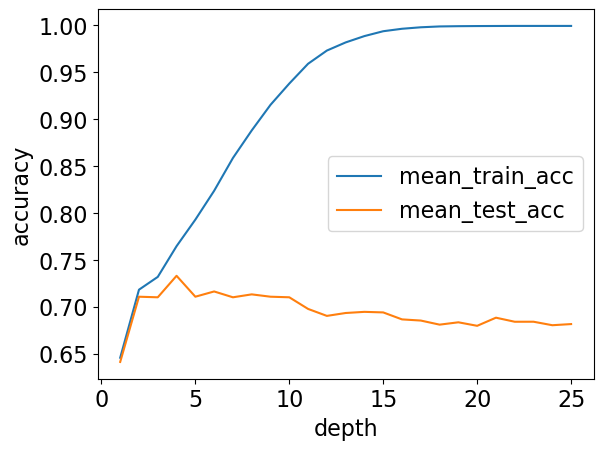

In [10]:
list = []

for i in range(1,26):
    list.append(i)

print("The length of the list of chosen depths is: ", len(list))

results = {
    "depth": [],
    "mean_train_acc": [],
    "mean_test_acc": []
}

for idx in list:
    model = DecisionTreeClassifier(max_depth=idx)
    model.fit(X_train, y_train)

    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    curr_mean_train_acc = np.mean(scores["train_score"])
    curr_mean_test_acc = np.mean(scores["test_score"])
    
    results["depth"].append(idx)
    results["mean_train_acc"].append(curr_mean_train_acc)
    results["mean_test_acc"].append(curr_mean_test_acc)

df_results = pd.DataFrame(results)
df_results.set_index(["depth"]).plot(ylabel="accuracy")

# Question: From these results, what depth would you pick as the optimal depth?

# My Answer: I would choose max_depth = 4 because it has the highest test accuracy. Increasing past max_depth = 4 widens
# the gap between mean_train_acc and mean_test_acc (overfitting) and decreasing below max_depth = 4 narrows the gap too
# much thus results in underfitting. Hence is why I think max_depth = 4 is a sweet spot.

df_results.set_index(["depth"]).iloc[3] # this yields the mean test accuracy to be used for Question 4 later

# Question: Do you think that the depth you chose would generalize to other 
# "spotify" datasets (i.e., data on other spotify users)?

# My Answer: Yes I think that the max_depth of 4 would generalize to other "spotify" datasets because it is neither
# underfitting nor overfitting, hence a sweet spot.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [11]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

# Create X_train, y_train from df_train, skipping song_title and artist
X_train, y_train = df_train.drop(columns=["target", "song_title", "artist"]), df_train["target"]

# Create X_test, y_test from df_test, skipping song_title and artist
X_test, y_test = df_train.drop(columns=["target", "song_title", "artist"]), df_train["target"]

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

curr_mean_test_acc = np.mean(scores["test_score"])

print("The test accuracy for max_depth of 4 is: ", curr_mean_test_acc)

# Question: How does it compare to the cross-validation score from the previous exercise? Briefly discuss.

# My Answer: It is close to the cross-validation score from the previous exercise, however, it is not close enough
# as restarting kernel, clearing all outputs, and re-running all cells I have observed that the previous score would
# always be within +/- 0.01 and as with this one.

The test accuracy for max_depth of 4 is:  0.6813702936891343


## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Question 1: To reiterate: If a value in the first feature (column) is less than 5.5, then it would predict negative (false). Then it can be said that the top 3 rows would be false and 2 of the last 3 rows would be positive or true (1 of the last 3 rows whose value in the first feature is 10 is incorrectly predicted to be negative because of the simple depth = 1 decision tree).

Question 2: The training accuracy would be 5/6 as per my reasoning above for Question 1.

Question 3: No it would not be possible.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 